In [45]:
import pandas as pd
import talib as ta
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from attention import Attention

[*********************100%***********************]  1 of 1 completed


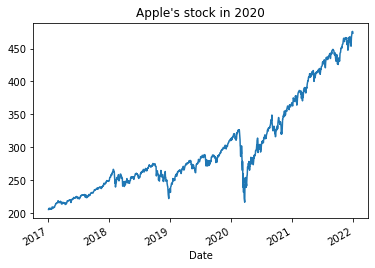

In [2]:
df = yf.download("SPY", 
                 start="2017-01-01", 
                 end="2022-01-01", index=False)

df["Adj Close"].plot(title="Apple's stock in 2020");

In [3]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,225.039993,225.830002,223.880005,225.240005,205.509094,91366500
1,2017-01-04,225.619995,226.750000,225.610001,226.580002,206.731674,78744400
2,2017-01-05,226.270004,226.580002,225.479996,226.399994,206.567490,78379000
3,2017-01-06,226.529999,227.750000,225.899994,227.210007,207.306549,71559900
4,2017-01-09,226.910004,227.070007,226.419998,226.460007,206.622223,46939700


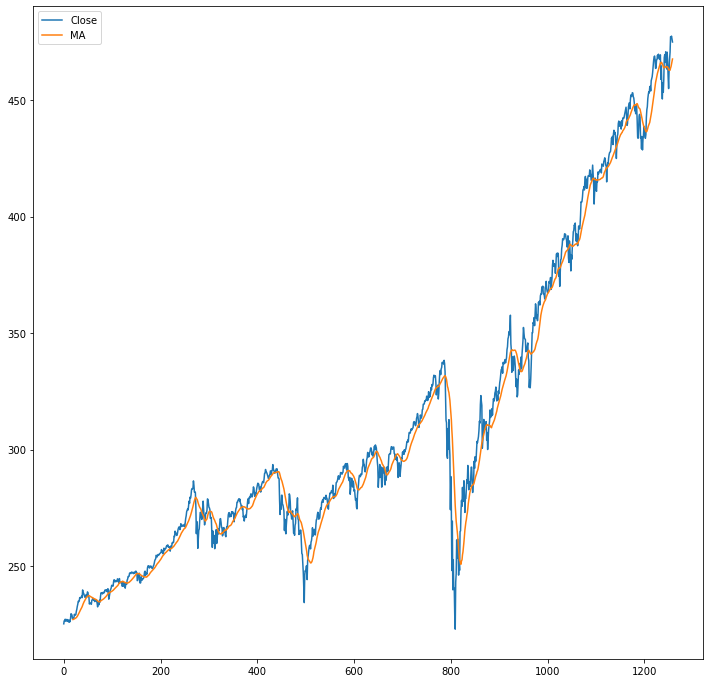

In [4]:
# create simple moving average

df['MA'] = ta.SMA(df['Close'],20)
df[['Close','MA']].plot(figsize=(12,12))
plt.show()



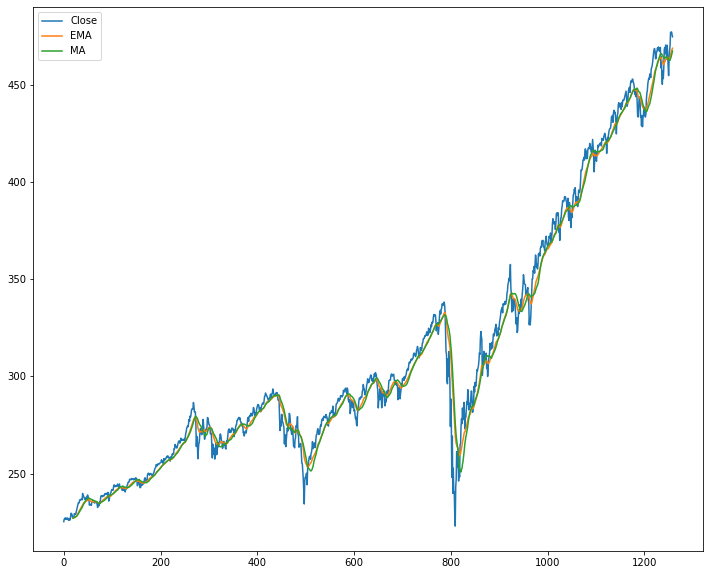

In [5]:
# adding exponential moving average
df['EMA'] = ta.EMA(df['Close'], timeperiod = 20)
df[['Close','EMA','MA']].plot(figsize=(12,10))
plt.show()

<AxesSubplot:>

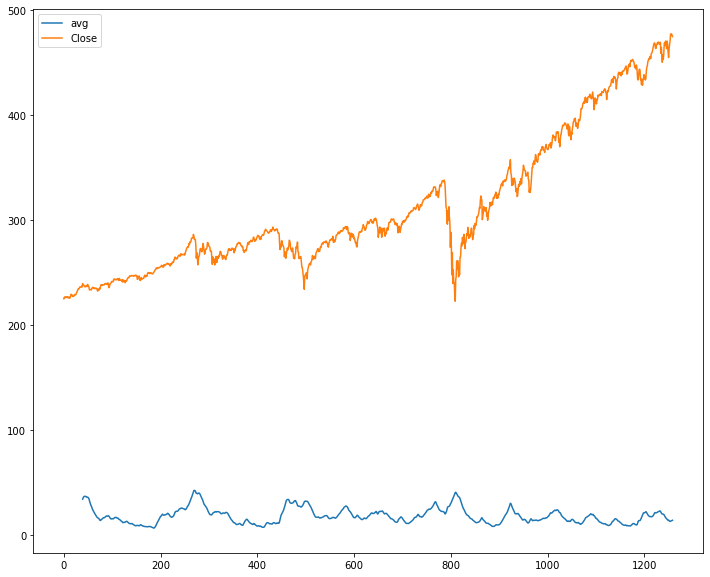

In [6]:
df['avg'] = ta.ADX(df['High'],df['Low'], df['Close'], timeperiod=20)
df[['avg','Close']].plot(figsize=(12,10))


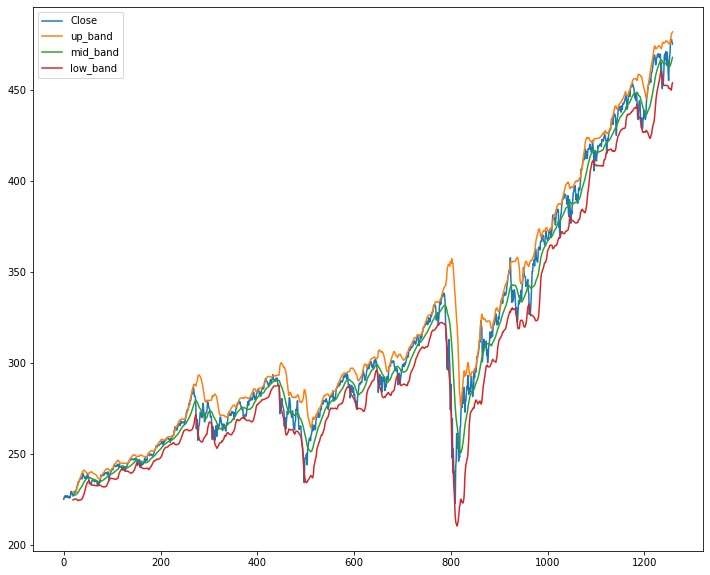

In [7]:
df['up_band'], df['mid_band'], df['low_band'] = ta.BBANDS(df['Close'], timeperiod =20)
df[['Close','up_band','mid_band','low_band']].plot(figsize=  
                                   (12,10))
plt.show()

In [8]:
df['Return'] = df['Close'].pct_change().dropna()

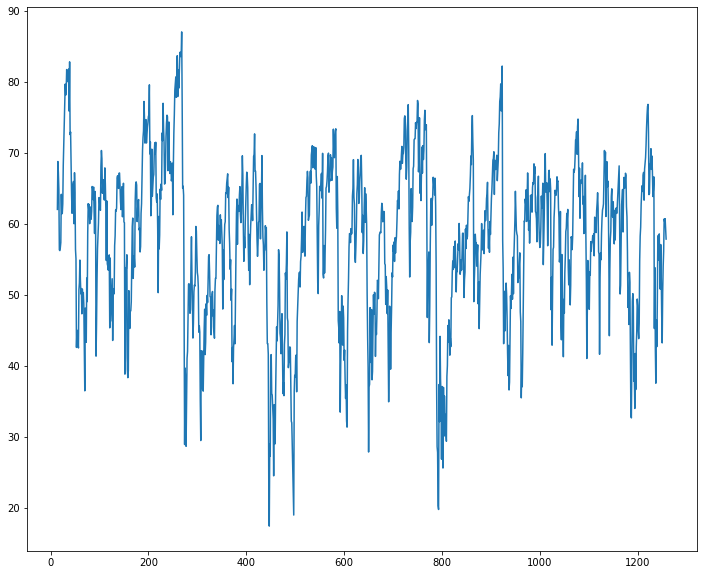

In [9]:
df['Relative'] = ta.RSI(df['Close'],14)
df['Relative'].plot(figsize=(12,10))
plt.show()

In [10]:
df.tail(20)
df2 = df.drop(['Date'], axis=1)
df2.tail(60)

,Open,High,Low,Close,Adj Close,Volume,MA,EMA,avg,up_band,mid_band,low_band,Return,Relative
1199,438.390015,441.679993,438.200012,438.660004,435.770508,72437500,438.737503,438.155343,21.338475,450.676809,438.737503,426.798197,0.008646,49.380232
1200,439.480011,439.890015,437.190002,437.859985,434.975739,74557400,438.358502,438.127214,21.397083,449.897210,438.358502,426.819794,-0.001824,48.474130
1201,437.160004,440.260010,434.619995,434.690002,431.826660,65233300,437.764003,437.799861,21.668916,448.759506,437.764003,426.768500,-0.007240,44.954186
1202,435.670013,436.100006,432.779999,433.619995,430.763702,71181200,437.236502,437.401778,22.074766,447.961017,437.236502,426.511987,-0.002462,43.798086
1203,434.709991,436.049988,431.540009,435.179993,432.313416,72974000,436.601501,437.190180,22.558012,446.171837,436.601501,427.031166,0.003598,45.979344
1204,439.079987,442.660004,438.579987,442.500000,439.585205,70236800,436.368001,437.695877,22.127511,445.085397,436.368001,427.650604,0.016821,54.836865
1205,444.750000,446.260010,444.089996,445.869995,442.932983,66260200,436.591501,438.474364,21.309115,446.014164,436.591501,427.168838,0.007616,58.232300
1206,443.970001,447.549988,443.269989,447.190002,444.244324,62213200,437.249001,439.304425,20.392092,447.651932,437.249001,426.846069,0.002961,59.516180
1207,448.920013,450.709991,448.269989,450.640015,447.671600,46996800,438.099501,440.384005,19.552073,449.871162,438.099501,426.327840,0.007715,62.739897
1208,451.130005,452.730011,451.010010,452.410004,449.429932,49571600,438.827002,441.529338,18.952217,452.146221,438.827002,425.507783,0.003928,64.310099


In [11]:
df3 = df2.fillna(method ='bfill') # filling the missing values with previous ones 
print(df3.isnull().sum())
print('\n')
print('There are {} number of days in the dataset.'.format(df.shape[0]))

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA           0
EMA          0
avg          0
up_band      0
mid_band     0
low_band     0
Return       0
Relative     0
dtype: int64


There are 1259 number of days in the dataset.


In [12]:
print(df3.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA           0
EMA          0
avg          0
up_band      0
mid_band     0
low_band     0
Return       0
Relative     0
dtype: int64


/Users/kylehammerberg/opt/anaconda3/envs/tf2/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kylehammerberg/opt/anaconda3/envs/tf2/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kylehammerberg/opt/anaconda3/envs/tf2/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

<Figure size 720x432 with 0 Axes>

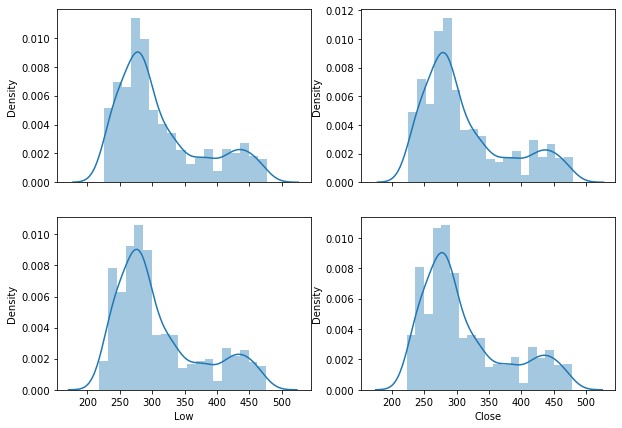

,Open,High,Low,Close
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,311.568300,313.163185,309.801001,311.603820
std,66.053746,66.285124,65.803884,66.091105
min,225.039993,225.830002,218.259995,222.949997
25%,265.789993,267.324997,263.525009,265.354996
50%,289.369995,290.320007,287.600006,288.899994
75%,341.665009,342.990005,338.279999,340.465012
max,477.929993,479.000000,476.059998,477.480011


In [13]:
import seaborn as sns
plt.figure(figsize=(10,6))

dataset = df3[['Open', 'High', 'Low', 'Close']] # dataframe with open, high, low, close

print("\n")
f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True)
sns.distplot( dataset["Open"] , ax=axes[0, 0])
sns.distplot( dataset["High"] , ax=axes[0, 1])
sns.distplot(dataset["Low"] , ax=axes[1, 0])
sns.distplot( dataset["Close"] , ax=axes[1, 1])
plt.show()
print('\n')
dataset.describe()

In [14]:
df3.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA', 'EMA',
       'avg', 'up_band', 'mid_band', 'low_band', 'Return', 'Relative'],
      dtype='object')

In [15]:
import copy
a = copy.deepcopy(df3)

In [16]:
# checking sample and feature count 
print('Total dataset has {} samples, and {} features.'.format(a.shape[0], a.shape[1]))

Total dataset has 1259 samples, and 14 features.


In [17]:
# verify no NaN
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
 6   MA         1259 non-null   float64
 7   EMA        1259 non-null   float64
 8   avg        1259 non-null   float64
 9   up_band    1259 non-null   float64
 10  mid_band   1259 non-null   float64
 11  low_band   1259 non-null   float64
 12  Return     1259 non-null   float64
 13  Relative   1259 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 137.8 KB


In [18]:
# check shape
a.shape

(1259, 14)

In [19]:
values = a.values
# ensure all data is float
values = values.astype('float32')
values

array([[ 2.2503999e+02,  2.2583000e+02,  2.2388000e+02, ...,
         2.2488448e+02,  5.9491931e-03,  6.2016232e+01],
       [ 2.2562000e+02,  2.2675000e+02,  2.2561000e+02, ...,
         2.2488448e+02,  5.9491931e-03,  6.2016232e+01],
       [ 2.2627000e+02,  2.2658000e+02,  2.2548000e+02, ...,
         2.2488448e+02, -7.9445640e-04,  6.2016232e+01],
       ...,
       [ 4.7698001e+02,  4.7856000e+02,  4.7592001e+02, ...,
         4.5028104e+02,  1.2792079e-03,  6.0708530e+01],
       [ 4.7792999e+02,  4.7900000e+02,  4.7567001e+02, ...,
         4.5254059e+02, -2.7645291e-03,  5.9219460e+01],
       [ 4.7564001e+02,  4.7685999e+02,  4.7467001e+02, ...,
         4.5367545e+02, -2.5201868e-03,  5.7830730e+01]], dtype=float32)

In [20]:
print("Min:", np.min(values))
print("Max:", np. max(values))

Min: -0.109423734
Max: 392220700.0


In [21]:
values = pd.DataFrame(values)

In [22]:
values

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,225.039993,225.830002,223.880005,225.240005,205.509094,91366496.0,227.069000,227.069000,34.477917,229.253525,227.069000,224.884476,0.005949,62.016232
1,225.619995,226.750000,225.610001,226.580002,206.731674,78744400.0,227.069000,227.069000,34.477917,229.253525,227.069000,224.884476,0.005949,62.016232
2,226.270004,226.580002,225.479996,226.399994,206.567490,78379000.0,227.069000,227.069000,34.477917,229.253525,227.069000,224.884476,-0.000794,62.016232
3,226.529999,227.750000,225.899994,227.210007,207.306549,71559904.0,227.069000,227.069000,34.477917,229.253525,227.069000,224.884476,0.003578,62.016232
4,226.910004,227.070007,226.419998,226.460007,206.622223,46939700.0,227.069000,227.069000,34.477917,229.253525,227.069000,224.884476,-0.003301,62.016232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,472.059998,477.309998,472.010010,477.260010,475.781921,56808600.0,463.779999,465.494751,13.459731,477.375122,463.779999,450.184875,0.014152,60.672852
1255,477.720001,478.809998,476.059998,476.869995,475.393127,47274600.0,464.393494,466.578094,13.726245,479.139923,464.393494,449.647095,-0.000817,60.279942
1256,476.980011,478.559998,475.920013,477.480011,476.001251,54503000.0,465.489502,467.616394,13.966189,480.697968,465.489502,450.281036,0.001279,60.708530
1257,477.929993,479.000000,475.670013,476.160004,474.685333,55329000.0,466.772491,468.430054,14.223971,481.004425,466.772491,452.540588,-0.002765,59.219460


In [23]:
def ts (a, look_back = 60, pred_col = 12):
    t = a.copy()
    t["id"] = range(1, len(t)+1)
    t = t.iloc[:-look_back, :]
    t.set_index('id', inplace =True)
    pred_value = a.copy()
    pred_value = pred_value.iloc[look_back:, pred_col]
    pred_value.columns = ["Pred"]
    pred_value = pd.DataFrame(pred_value)
    
    pred_value["id"] = range(1, len(pred_value)+1)
    pred_value.set_index('id', inplace = True)
    final_df= pd.concat([t, pred_value], axis=1)
    
    return final_df

In [24]:
arr_df = ts(values, 60,12)

In [25]:
arr_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,12
id,,,,,,,,,,,,,,,
1,225.039993,225.830002,223.880005,225.240005,205.509094,91366496.0,227.069000,227.069000,34.477917,229.253525,227.069000,224.884476,0.005949,62.016232,0.003184
2,225.619995,226.750000,225.610001,226.580002,206.731674,78744400.0,227.069000,227.069000,34.477917,229.253525,227.069000,224.884476,0.005949,62.016232,-0.002328
3,226.270004,226.580002,225.479996,226.399994,206.567490,78379000.0,227.069000,227.069000,34.477917,229.253525,227.069000,224.884476,-0.000794,62.016232,-0.001739
4,226.529999,227.750000,225.899994,227.210007,207.306549,71559904.0,227.069000,227.069000,34.477917,229.253525,227.069000,224.884476,0.003578,62.016232,0.000637
5,226.910004,227.070007,226.419998,226.460007,206.622223,46939700.0,227.069000,227.069000,34.477917,229.253525,227.069000,224.884476,-0.003301,62.016232,-0.002973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,436.019989,436.769989,428.779999,429.140015,426.313232,140506000.0,443.141510,440.708008,17.022840,457.181824,443.141510,429.101196,-0.012222,33.958065,0.014152
1196,430.980011,436.029999,427.230011,434.239990,431.379639,129240096.0,442.194000,440.091980,18.246414,455.948730,442.194000,428.439270,0.011884,41.703346,-0.000817
1197,433.000000,433.959991,426.359985,428.640015,425.816528,128570000.0,440.972015,439.001343,19.467100,454.981293,440.972015,426.962708,-0.012896,36.624226,0.001279


In [26]:
arr_df.columns = ['v1(t-60)','v2(t-60)','v3(t-60)','v4(t-60)','v5(t-60)','v6(t-60)','v7(t-60)','v8(t-60)','v9(t-60)','v10(t-60)','v11(t-60)','v12(t-60)','v13(t-60)','v14(t-60)','v_tar(t)']

In [27]:
arr_df.head()

,v1(t-60),v2(t-60),v3(t-60),v4(t-60),v5(t-60),v6(t-60),v7(t-60),v8(t-60),v9(t-60),v10(t-60),v11(t-60),v12(t-60),v13(t-60),v14(t-60),v_tar(t)
id,,,,,,,,,,,,,,,
1,225.039993,225.830002,223.880005,225.240005,205.509094,91366496.0,227.069,227.069,34.477917,229.253525,227.069,224.884476,0.005949,62.016232,0.003184
2,225.619995,226.750000,225.610001,226.580002,206.731674,78744400.0,227.069,227.069,34.477917,229.253525,227.069,224.884476,0.005949,62.016232,-0.002328
3,226.270004,226.580002,225.479996,226.399994,206.567490,78379000.0,227.069,227.069,34.477917,229.253525,227.069,224.884476,-0.000794,62.016232,-0.001739
4,226.529999,227.750000,225.899994,227.210007,207.306549,71559904.0,227.069,227.069,34.477917,229.253525,227.069,224.884476,0.003578,62.016232,0.000637
5,226.910004,227.070007,226.419998,226.460007,206.622223,46939700.0,227.069,227.069,34.477917,229.253525,227.069,224.884476,-0.003301,62.016232,-0.002973


In [28]:
print(arr_df.describe())

          v1(t-60)     v2(t-60)     v3(t-60)     v4(t-60)     v5(t-60)  \
count  1199.000000  1199.000000  1199.000000  1199.000000  1199.000000   
mean    304.108002   305.671539   302.366974   304.136017   291.083832   
std      58.369007    58.560856    58.142719    58.392757    63.137566   
min     225.039993   225.830002   218.259995   222.949997   205.509094   
25%     264.220001   266.650009   262.480011   264.125000   247.614014   
50%     286.640015   288.519989   285.399994   287.049988   272.740387   
75%     331.590012   333.244995   330.480011   331.529999   322.050903   
max     453.320007   454.049988   451.910004   453.190002   448.767120   

          v6(t-60)     v7(t-60)     v8(t-60)     v9(t-60)    v10(t-60)  \
count       1199.0  1199.000000  1199.000000  1199.000000  1199.000000   
mean    82903344.0   302.482574   302.463928    19.048624   311.601868   
std     45687676.0    57.271992    57.085522     7.910214    58.839211   
min     20270000.0   227.069000   227

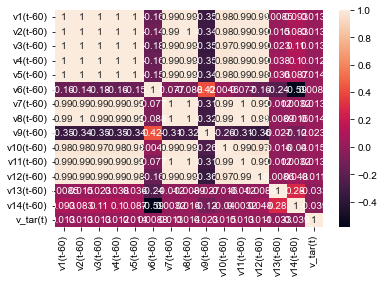

In [29]:

corrMatrix = arr_df.corr()
sns.heatmap(corrMatrix, annot=True)

sns.set(rc = {'figure.figsize':(40,8)})
plt.show()

In [30]:
# split into train and test sets
val = arr_df.values
train_sample =int(len(a)*0.8)
train = val[: train_sample, :]
test = val[train_sample:, :]

print(train.shape, test.shape)

(1007, 15) (192, 15)


In [31]:
test = pd.DataFrame(test)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,375.309998,375.450012,364.820007,368.790009,362.811676,110210800.0,369.239502,368.284119,21.308168,373.809875,369.239502,364.669128,-0.013614,54.227470,0.004053
1,368.100006,372.500000,368.049988,371.329987,365.310425,66426200.0,369.313507,368.574219,21.166922,373.968170,369.313507,364.658844,0.006887,58.154968,0.010799
2,369.709991,376.980011,369.119995,373.549988,367.494476,107997696.0,369.536499,369.048096,21.419914,374.541138,369.536499,364.531860,0.005979,61.281998,0.014353
3,376.100006,379.899994,375.910004,379.100006,372.954498,68766800.0,369.983002,370.005432,21.885952,376.499207,369.983002,363.466797,0.014857,67.767059,-0.000591
4,380.589996,381.489990,377.100006,381.260010,375.079529,71677200.0,370.703491,371.077301,22.446020,378.694458,370.703491,362.712524,0.005698,69.881424,0.001157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,436.019989,436.769989,428.779999,429.140015,426.313232,140506000.0,443.141510,440.708008,17.022840,457.181824,443.141510,429.101196,-0.012222,33.958065,0.014152
188,430.980011,436.029999,427.230011,434.239990,431.379639,129240096.0,442.194000,440.091980,18.246414,455.948730,442.194000,428.439270,0.011884,41.703346,-0.000817
189,433.000000,433.959991,426.359985,428.640015,425.816528,128570000.0,440.972015,439.001343,19.467100,454.981293,440.972015,426.962708,-0.012896,36.624226,0.001279
190,430.239990,435.489990,429.390015,433.100006,430.247131,90682496.0,440.054016,438.439301,20.372995,453.592224,440.054016,426.515778,0.010405,42.618317,-0.002765


In [32]:
train

array([[ 2.2503999e+02,  2.2583000e+02,  2.2388000e+02, ...,
         5.9491931e-03,  6.2016232e+01,  3.1841726e-03],
       [ 2.2562000e+02,  2.2675000e+02,  2.2561000e+02, ...,
         5.9491931e-03,  6.2016232e+01, -2.3275965e-03],
       [ 2.2627000e+02,  2.2658000e+02,  2.2548000e+02, ...,
        -7.9445640e-04,  6.2016232e+01, -1.7392196e-03],
       ...,
       [ 3.7381000e+02,  3.7400000e+02,  3.7082999e+02, ...,
        -1.9077893e-03,  6.2229130e+01,  1.6114956e-02],
       [ 3.7234000e+02,  3.7310001e+02,  3.7157001e+02, ...,
         1.4267991e-03,  6.3003212e+01, -5.0510681e-04],
       [ 3.7178000e+02,  3.7466000e+02,  3.7123001e+02, ...,
         5.0808215e-03,  6.5702599e+01, -2.6529583e-03]], dtype=float32)

In [33]:
X, y = train, test

In [34]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler 
ct = ColumnTransformer(
    [('scaler', StandardScaler(),[0,1,2,3,4,5,6,7,8,9,10,11,13])],
    remainder='passthrough') 
X = ct.fit_transform(X)

NameError: name 'X_new' is not defined

In [ ]:
X[:,12]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#X = scaler.fit_transform(X)


In [ ]:
len(X[:,1:12])

In [36]:
print(X)
print('\n')
print(X.shape)
print(y.shape)

[[-1.7158078e+00 -1.7266452e+00 -1.7130965e+00 ...  3.8942710e-01
   5.9491931e-03  3.1841726e-03]
 [-1.6986054e+00 -1.6995209e+00 -1.6614099e+00 ...  3.8942710e-01
   5.9491931e-03 -2.3275965e-03]
 [-1.6793267e+00 -1.7045330e+00 -1.6652939e+00 ...  3.8942710e-01
  -7.9445640e-04 -1.7392196e-03]
 ...
 [ 2.6965935e+00  2.6418498e+00  2.6772921e+00 ...  4.0755981e-01
  -1.9077893e-03  1.6114956e-02]
 [ 2.6529944e+00  2.6153152e+00  2.6994016e+00 ...  4.7348908e-01
   1.4267991e-03 -5.0510681e-04]
 [ 2.6363854e+00  2.6613088e+00  2.6892436e+00 ...  7.0339817e-01
   5.0808215e-03 -2.6529583e-03]]


(1007, 15)
(192, 15)


In [ ]:
X.shape[0]

In [37]:
X_train = []
y_train = []
for i in range(60, X.shape[0]):
    X_train.append(X[i-60:i])
    y_train.append(X[i,14])
    if i <= 61:
        print(X_train)
        print('\n')
        print(y_train)
        print()

[array([[-1.71580780e+00, -1.72664523e+00, -1.71309650e+00,
        -1.71209288e+00, -1.68214786e+00,  1.42386213e-01,
        -1.67924607e+00, -1.69179678e+00,  1.78719878e+00,
        -1.72779000e+00, -1.67924607e+00, -1.52391934e+00,
         3.89427096e-01,  5.94919315e-03,  3.18417256e-03],
       [-1.69860542e+00, -1.69952095e+00, -1.66140985e+00,
        -1.67230201e+00, -1.64940643e+00, -1.20229244e-01,
        -1.67924607e+00, -1.69179678e+00,  1.78719878e+00,
        -1.72779000e+00, -1.67924607e+00, -1.52391934e+00,
         3.89427096e-01,  5.94919315e-03, -2.32759654e-03],
       [-1.67932665e+00, -1.70453298e+00, -1.66529393e+00,
        -1.67764735e+00, -1.65380335e+00, -1.27831757e-01,
        -1.67924607e+00, -1.69179678e+00,  1.78719878e+00,
        -1.72779000e+00, -1.67924607e+00, -1.52391934e+00,
         3.89427096e-01, -7.94456399e-04, -1.73921965e-03],
       [-1.67161536e+00, -1.67003798e+00, -1.65274572e+00,
        -1.65359414e+00, -1.63401091e+00, -2.6970991

In [38]:
y_train

[0.00065803644,
 -0.0080561945,
 0.008950415,
 -0.0087888595,
 0.0018644994,
 0.0016956313,
 0.0023120332,
 -0.009144463,
 0.006485128,
 0.0010738693,
 -0.000742636,
 0.0075147282,
 0.001680274,
 0.0046641002,
 -0.00012216477,
 0.00052948674,
 0.005413994,
 0.00044536463,
 -0.00089033274,
 -0.00024302315,
 0.0024308842,
 4.03949e-05,
 -0.00092953857,
 -0.001173112,
 -0.0005670057,
 0.0022288084,
 0.0004851816,
 -0.0019398469,
 0.0018221451,
 0.0018592274,
 -0.0024609698,
 -4.0421044e-05,
 -0.01411529,
 0.001476865,
 0.00991315,
 -0.00012167916,
 0.0017443834,
 -0.015590857,
 -0.0015631644,
 0.0007827744,
 0.010457014,
 -0.0035854175,
 -0.0023306839,
 0.0023361288,
 4.092969e-05,
 0.0011448615,
 0.004737547,
 0.0060160602,
 0.0014141615,
 -0.007182048,
 0.0034137866,
 -0.00012150174,
 -0.0011746802,
 0.010665929,
 0.0033706364,
 0.00047988447,
 -0.00031978986,
 -0.00359868,
 0.0021268863,
 0.0010011212,
 0.00036002856,
 -0.0026793496,
 0.00020050142,
 -0.002044619,
 0.0006026158,
 0.003

In [47]:
X_train, y_train = np.array(X_train), np.array(y_train)

# x train shape = (samples, look_back, features)
print(X_train.shape,y_train.shape)
IS = (X_train.shape[1], X_train.shape[2])
IS

(947, 60, 15) (947,)


(60, 15)

In [43]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

tf.enable_v2_behavior()

print(tf.__version__)
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

2.7.0


In [48]:
#create lstm model
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units = 64, return_sequences = True, 
                                   input_shape = (IS)))
model_lstm.add(Attention(units=32))
  
model_lstm.add(tf.keras.layers.Dense(units = 1))
model_lstm.compile(loss='mae', optimizer='adam')
model_lstm.summary()

       
#create GRU model
model_gru = tf.keras.Sequential()
model_gru.add(tf.keras.layers.GRU(75, return_sequences = True, input_shape=(IS)))
model_gru.add(tf.keras.layers.GRU(units=30, return_sequences=True))
model_gru.add(tf.keras.layers.GRU(units=30))
model_gru.add(tf.keras.layers.Dense(units=1))

model_gru.compile(loss='mae', optimizer='adam')
model_gru.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 64)            20480     
                                                                 
 attention (Attention)       (None, 32)                8192      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 28,705
Trainable params: 28,705
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 75)            20700     
                                                                 
 gru_1 (GRU)                

In [50]:
train = pd.DataFrame(train)

In [51]:
corrMatrix = df.corr()
print (corrMatrix)

               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999628  0.999508  0.999306   0.998653 -0.161503   
High       0.999628  1.000000  0.999107  0.999473   0.999246 -0.147190   
Low        0.999508  0.999107  1.000000  0.999556   0.998450 -0.182089   
Close      0.999306  0.999473  0.999556  1.000000   0.999296 -0.167919   
Adj Close  0.998653  0.999246  0.998450  0.999296   1.000000 -0.153472   
Volume    -0.161503 -0.147190 -0.182089 -0.167919  -0.153472  1.000000   
MA         0.992860  0.994221  0.991177  0.992500   0.992833 -0.095363   
EMA        0.995159  0.996338  0.993676  0.994838   0.995129 -0.105349   
avg       -0.241557 -0.233600 -0.249034 -0.241628  -0.236421  0.460445   
up_band    0.982102  0.985132  0.979016  0.981888   0.985062 -0.025496   
mid_band   0.992860  0.994221  0.991177  0.992500   0.992833 -0.095363   
low_band   0.991000  0.990612  0.990796  0.990493   0.987874 -0.166623   
Return     0.014832  0.020565  0.02752

In [52]:
look_back = train.tail(60)
print(look_back)
data = look_back.append(test)
print(data)
data.shape

              0           1           2           3           4            5   \
947   338.119995  341.630005  338.089996  340.760010  333.813141   56999600.0   
948   342.850006  343.850006  341.859985  343.779999  336.771515   45242500.0   
949   345.559998  347.350006  344.890015  346.850006  339.778931   59528600.0   
950   349.589996  354.019989  349.059998  352.429993  345.245209   80388496.0   
951   352.279999  352.470001  349.089996  350.130005  342.992065   73255504.0   
952   350.750000  351.929993  347.140015  347.929993  340.836945   57727900.0   
953   343.709991  348.019989  343.130005  347.500000  340.415680   60357700.0   
954   348.959991  350.750000  347.100006  347.290009  340.209991   89501904.0   
955   348.649994  349.329987  341.040009  342.010010  335.037598   68425600.0   
956   343.459991  346.880005  342.640015  343.380005  336.379700   60051900.0   
957   343.329987  345.670013  342.399994  342.730011  335.742950   63575000.0   
958   342.959991  345.239990

             0           1           2           3           4            5   \
947  338.119995  341.630005  338.089996  340.760010  333.813141   56999600.0   
948  342.850006  343.850006  341.859985  343.779999  336.771515   45242500.0   
949  345.559998  347.350006  344.890015  346.850006  339.778931   59528600.0   
950  349.589996  354.019989  349.059998  352.429993  345.245209   80388496.0   
951  352.279999  352.470001  349.089996  350.130005  342.992065   73255504.0   
..          ...         ...         ...         ...         ...          ...   
187  436.019989  436.769989  428.779999  429.140015  426.313232  140506000.0   
188  430.980011  436.029999  427.230011  434.239990  431.379639  129240096.0   
189  433.000000  433.959991  426.359985  428.640015  425.816528  128570000.0   
190  430.239990  435.489990  429.390015  433.100006  430.247131   90682496.0   
191  429.269989  435.119995  427.540009  434.899994  432.035278  113032200.0   

             6           7          8  

/var/folders/1f/n1lfmhwx41gcpl_9k02ln2cr0000gn/T/ipykernel_42697/3015563644.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = look_back.append(test)


(252, 15)

In [53]:
#inputs = scaler.transform(data)
inputs = data.to_numpy()

In [54]:
inputs[61:]

array([[ 3.6810001e+02,  3.7250000e+02,  3.6804999e+02, ...,
         6.8873288e-03,  5.8154968e+01,  1.0799079e-02],
       [ 3.6970999e+02,  3.7698001e+02,  3.6912000e+02, ...,
         5.9785130e-03,  6.1281998e+01,  1.4353112e-02],
       [ 3.7610001e+02,  3.7989999e+02,  3.7591000e+02, ...,
         1.4857498e-02,  6.7767059e+01, -5.9058529e-04],
       ...,
       [ 4.3300000e+02,  4.3395999e+02,  4.2635999e+02, ...,
        -1.2896039e-02,  3.6624226e+01,  1.2792079e-03],
       [ 4.3023999e+02,  4.3548999e+02,  4.2939001e+02, ...,
         1.0404982e-02,  4.2618317e+01, -2.7645291e-03],
       [ 4.2926999e+02,  4.3512000e+02,  4.2754001e+02, ...,
         4.1560559e-03,  4.4883995e+01, -2.5201868e-03]], dtype=float32)

In [55]:
X_test = []
y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i,14])
    if i <= 61:
        print(X_test)
        print('\n')
        print(y_test)
        print()

[array([[ 3.38119995e+02,  3.41630005e+02,  3.38089996e+02,
         3.40760010e+02,  3.33813141e+02,  5.69996000e+07,
         3.33590515e+02,  3.35261536e+02,  1.52687168e+01,
         3.43740753e+02,  3.33590515e+02,  3.23440247e+02,
         1.74066741e-02,  5.55178642e+01, -1.36139840e-02],
       [ 3.42850006e+02,  3.43850006e+02,  3.41859985e+02,
         3.43779999e+02,  3.36771515e+02,  4.52425000e+07,
         3.34084991e+02,  3.36072815e+02,  1.47464333e+01,
         3.45166382e+02,  3.34084991e+02,  3.23003632e+02,
         8.86251032e-03,  5.80468636e+01,  6.88732881e-03],
       [ 3.45559998e+02,  3.47350006e+02,  3.44890015e+02,
         3.46850006e+02,  3.39778931e+02,  5.95286000e+07,
         3.34724487e+02,  3.37099213e+02,  1.45561829e+01,
         3.47124084e+02,  3.34724487e+02,  3.22324921e+02,
         8.93015135e-03,  6.05050926e+01,  5.97851304e-03],
       [ 3.49589996e+02,  3.54019989e+02,  3.49059998e+02,
         3.52429993e+02,  3.45245209e+02,  8.0388496

In [56]:
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)

(192, 60, 15) (192,)


In [57]:
y_test

array([ 0.00405334,  0.01079908,  0.01435311, -0.00059059,  0.0011573 ,
        0.00474678,  0.00727015,  0.00036459,  0.00296368, -0.00341514,
        0.01074245,  0.00334243, -0.00491305, -0.00732154,  0.0094621 ,
       -0.00913312,  0.01084241,  0.00208762, -0.0002155 , -0.0002874 ,
        0.00637279, -0.00657051,  0.00215678, -0.00616934,  0.0003128 ,
        0.00798559,  0.00727799, -0.00990238, -0.00892475, -0.02124523,
        0.01201252,  0.01535534, -0.00254452, -0.00861568, -0.00262178,
        0.01075796, -0.00081872,  0.01019427, -0.00221873,  0.00198455,
        0.00052497,  0.00178874, -0.00088086,  0.0015726 , -0.00371136,
        0.00914587, -0.00097019,  0.00021317, -0.00149191,  0.00464839,
        0.00165249,  0.00223896, -0.00183417, -0.00558336, -0.00033163,
       -0.01670732,  0.01431594,  0.0053462 , -0.00120531,  0.00591576,
        0.00355206,  0.00201593,  0.00053808,  0.00084168,  0.0055366 ,
        0.00764354, -0.00182147,  0.00353406, -0.00814799,  0.01

In [70]:
X_test.shape

(192, 60, 15)

In [58]:
# fit network
history_lstm = model_lstm.fit(X_train, y_train, 
                              epochs = 20, 
                              batch_size = 32, 
                              validation_data = (X_test, y_test),  
                              shuffle=False)

Epoch 1/20


2022-04-14 18:25:23.987493: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "110" frequency: 2000 num_cores: 8 environment { key: "cpu_instruction_set" value: "SSE, SSE2, SSE3, SSSE3" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 524288 l3_cache_size: 6291456 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


30/30 [==============================] - 3s 33ms/step - loss: 0.1511 - val_loss: 0.2332
Epoch 2/20
 4/30 [===>..........................] - ETA: 0s - loss: 0.1332

2022-04-14 18:25:25.231836: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "110" frequency: 2000 num_cores: 8 environment { key: "cpu_instruction_set" value: "SSE, SSE2, SSE3, SSSE3" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 524288 l3_cache_size: 6291456 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


30/30 [==============================] - 1s 19ms/step - loss: 0.1425 - val_loss: 0.6386
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2791 - val_loss: 0.5492
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2563 - val_loss: 0.6285
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2617 - val_loss: 0.4621
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1879 - val_loss: 0.4731
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0773 - val_loss: 0.2153
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0990 - val_loss: 0.3112
Epoch 9/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0991 - val_loss: 0.3248
Epoch 10/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0701 - val_loss: 0.3698
Epoch 11/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0865 - val_loss: 0.3380
Epoch 12/20
30/30 [

In [59]:
# fit network
gru_history = model_gru.fit(X_train, y_train, epochs = 20, batch_size = 64, 
                        validation_data = (X_test, y_test), shuffle=False)


Epoch 1/20
15/15 [==============================] - 6s 132ms/step - loss: 0.1226 - val_loss: 0.0870
Epoch 2/20
15/15 [==============================] - 1s 60ms/step - loss: 0.0431 - val_loss: 0.0284
Epoch 3/20
15/15 [==============================] - 1s 59ms/step - loss: 0.0661 - val_loss: 0.1393
Epoch 4/20
15/15 [==============================] - 1s 59ms/step - loss: 0.0947 - val_loss: 0.0141
Epoch 5/20
15/15 [==============================] - 1s 59ms/step - loss: 0.1844 - val_loss: 0.1604
Epoch 6/20
15/15 [==============================] - 1s 63ms/step - loss: 0.1299 - val_loss: 0.1494
Epoch 7/20
15/15 [==============================] - 1s 63ms/step - loss: 0.1640 - val_loss: 0.1139
Epoch 8/20
15/15 [==============================] - 1s 60ms/step - loss: 0.1081 - val_loss: 0.0812
Epoch 9/20
15/15 [==============================] - 1s 59ms/step - loss: 0.0515 - val_loss: 0.0621
Epoch 10/20
15/15 [==============================] - 1s 59ms/step - loss: 0.0379 - val_loss: 0.0417
Epoch 11

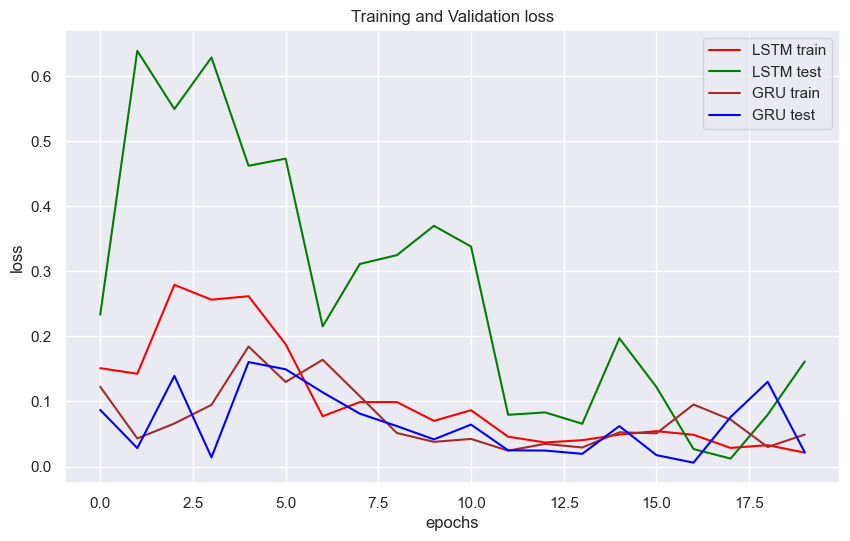

In [60]:
plt.figure(figsize=(10,6), dpi=100)
plt.plot(history_lstm.history['loss'], label='LSTM train', color='red')
plt.plot(history_lstm.history['val_loss'], label='LSTM test', color='green')
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training and Validation loss')
plt.show()

In [61]:
y_pred_LSTM = model_lstm.predict(X_test)
y_pred_GRU = model_gru.predict(X_test)

2022-04-14 18:26:01.158315: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:689] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "110" frequency: 2000 num_cores: 8 environment { key: "cpu_instruction_set" value: "SSE, SSE2, SSE3, SSSE3" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 524288 l3_cache_size: 6291456 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


In [ ]:
X_test.shape

In [ ]:
#scaler.scale_

In [ ]:
y_test

In [ ]:
normal_scale = 1/0.0067217853
normal_scale

In [ ]:
#y_pred_LSTM = y_pred_LSTM * normal_scale
#y_pred_GRU = y_pred_GRU * normal_scale
#y_test = y_test * normal_scale

In [62]:
mean_y_test = y_test.mean()
mean_y_lstm_pred = y_pred_LSTM.mean()
print(mean_y_test, mean_y_lstm_pred)
accuracy = round((mean_y_lstm_pred / mean_y_test)*100,2)
print(f'Accuracy = {accuracy}') 

0.0009934203 0.1624441
Accuracy = 16352.0


In [63]:
y_pred_LSTM

array([[0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],
       [0.1624441],


In [64]:
from sklearn.metrics import mean_squared_error
rms_LSTM = mean_squared_error(y_test, y_pred_LSTM, squared=False)
rms_GRU = mean_squared_error(y_test, y_pred_GRU, squared=False)


In [65]:
print(rms_LSTM)
print(rms_GRU)

0.16163167
0.023112545


In [66]:
y_test

array([ 0.00405334,  0.01079908,  0.01435311, -0.00059059,  0.0011573 ,
        0.00474678,  0.00727015,  0.00036459,  0.00296368, -0.00341514,
        0.01074245,  0.00334243, -0.00491305, -0.00732154,  0.0094621 ,
       -0.00913312,  0.01084241,  0.00208762, -0.0002155 , -0.0002874 ,
        0.00637279, -0.00657051,  0.00215678, -0.00616934,  0.0003128 ,
        0.00798559,  0.00727799, -0.00990238, -0.00892475, -0.02124523,
        0.01201252,  0.01535534, -0.00254452, -0.00861568, -0.00262178,
        0.01075796, -0.00081872,  0.01019427, -0.00221873,  0.00198455,
        0.00052497,  0.00178874, -0.00088086,  0.0015726 , -0.00371136,
        0.00914587, -0.00097019,  0.00021317, -0.00149191,  0.00464839,
        0.00165249,  0.00223896, -0.00183417, -0.00558336, -0.00033163,
       -0.01670732,  0.01431594,  0.0053462 , -0.00120531,  0.00591576,
        0.00355206,  0.00201593,  0.00053808,  0.00084168,  0.0055366 ,
        0.00764354, -0.00182147,  0.00353406, -0.00814799,  0.01

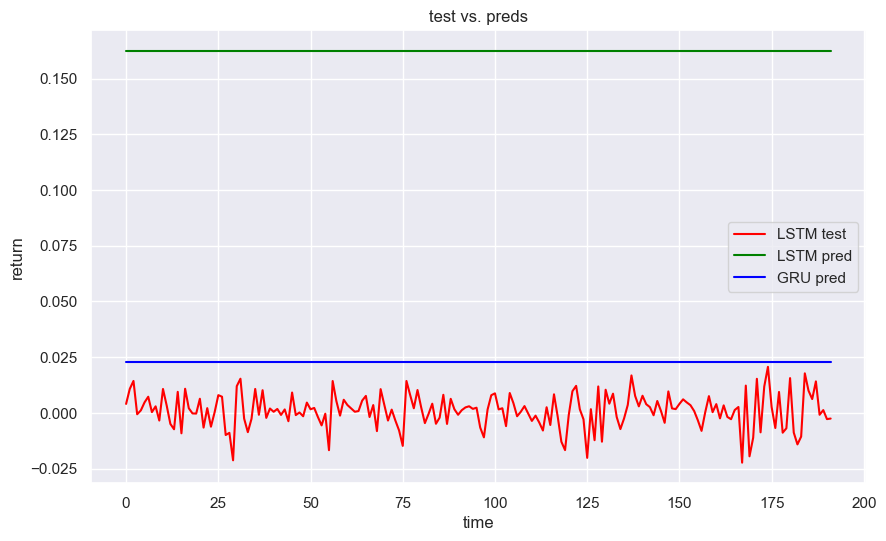

In [67]:
plt.figure(figsize=(10,6), dpi=100)
plt.plot(y_test, label='LSTM test', color='red')
plt.plot(y_pred_LSTM, label='LSTM pred', color='green')
plt.plot(y_pred_GRU, label='GRU pred', color='blue')
plt.xlabel('time')
plt.ylabel('return')
plt.legend()
plt.title('test vs. preds')
plt.show()

In [ ]:
y_test

In [ ]:
y_pred_LSTM

In [ ]:
y_test